This notebook explores the concept of eigenvalues and eigenvectors using Python.

Date Created: 11 Oct 2018
<br>
Last Modified: 12 Oct 2018 
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

# 1.0 Transforming a point with a matrix

In [3]:
A = np.array( [[1,1], [1, 0]] )

In [4]:
A

array([[1, 1],
       [1, 0]])

In [5]:
A.shape

(2, 2)

In [6]:
x = np.array([-0.1,0.5])

In [7]:
x

array([-0.1,  0.5])

In [8]:
y = np.dot(A,x) # This is matrix mutliplication y = Ax

In [9]:
y

array([ 0.4, -0.1])

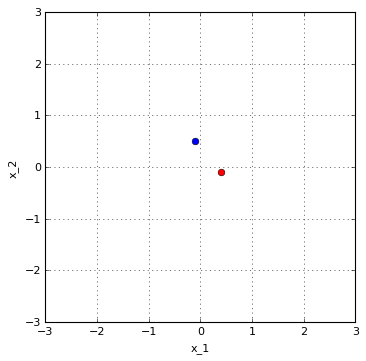

In [10]:
fig = plt.figure(figsize=(5,5))
plt.plot(x[0], x[1], 'bo')
plt.plot(y[0], y[1], 'ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()

plt.show()

# 1.1 Transforming a bunch of points with a matrix

In [11]:
N = 100
theta = np.linspace(2*np.pi/N, 2*np.pi, N)

x = np.zeros([2,N])
x[0,:] = np.cos(theta)
x[1,:] = np.sin(theta)

In [12]:
x.shape

(2, 100)

In [13]:
y = np.dot(A,x)

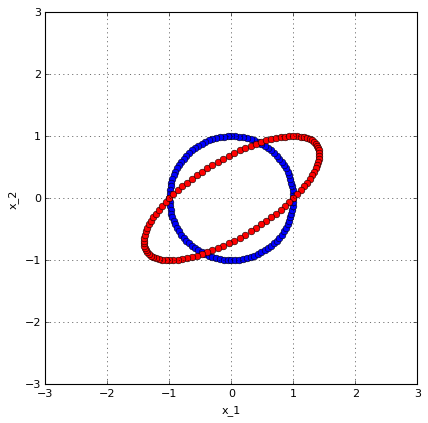

In [14]:
fig = plt.figure(figsize=(6,6))
plt.plot(x[0,:], x[1,:], 'bo')
plt.plot(y[0,:], y[1,:], 'ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()

plt.show()

# 1.2 Introducing Eigenvalues and Eigenvectors

In [15]:
w, v = np.linalg.eig(A)

In [16]:
w

array([ 1.61803399, -0.61803399])

In [17]:
v

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

In [18]:
np.linspace(-3,3,10)

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

In [19]:
x_vec = np.linspace(-3,3,10)
e_1 = (v[1,0]/v[0,0]) * x_vec
e_2 = (v[1,1]/v[0,1]) * x_vec

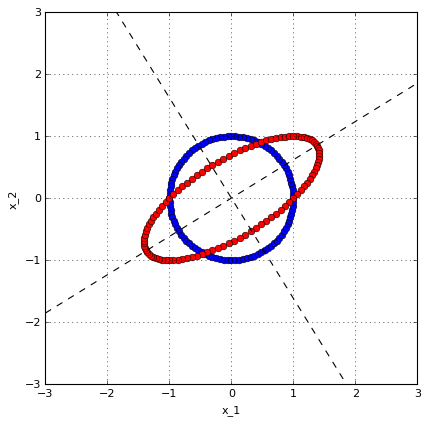

In [20]:
fig = plt.figure(figsize=(6,6))
plt.plot(x[0,:], x[1,:], 'bo')
plt.plot(y[0,:], y[1,:], 'ro')
plt.plot(x_vec, e_1, 'k--')
plt.plot(x_vec, e_2, 'k--')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()

plt.show()

# 1.3 Another way to see it - Transforming a point with the same matrix a bunch of times

In [21]:
x = np.array([-0.1,0.5])

In [22]:
it_max = 10

# Preallocate memory
trajectory = np.zeros([2,it_max])
trajectory[0,0] = x[0]
trajectory[1,0] = x[1]

for it in range(1,it_max):
    print(it)
    x = np.dot(A,x)
    
    trajectory[0,it] = x[0]
    trajectory[1,it] = x[1]

1
2
3
4
5
6
7
8
9


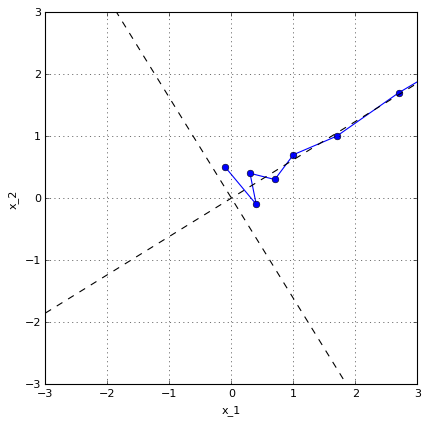

In [23]:
fig = plt.figure(figsize=(6,6))
plt.plot(trajectory[0,:], trajectory[1,:], 'bo-')
plt.plot(x_vec, e_1, 'k--')
plt.plot(x_vec, e_2, 'k--')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()

plt.show()

In [24]:
X, Y = np.meshgrid(np.arange(-3,3+1,1), np.arange(-3,3+1,1))

In [25]:
np.arange(-3,3+1,1)

array([-3, -2, -1,  0,  1,  2,  3])

In [26]:
X

array([[-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3]])

In [27]:
Y

array([[-3, -3, -3, -3, -3, -3, -3],
       [-2, -2, -2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3]])

In [28]:
x_ravel = X.ravel()

In [29]:
y_ravel = Y.ravel()

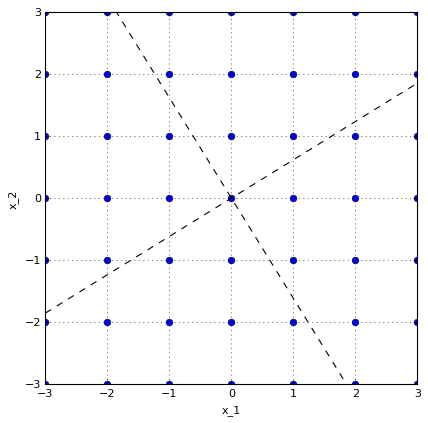

In [30]:
fig = plt.figure(figsize=(6,6))
plt.plot(x_ravel, y_ravel, 'bo')
plt.plot(x_vec, e_1, 'k--')
plt.plot(x_vec, e_2, 'k--')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()

plt.show()

In [31]:
N_pt = len(x_ravel)

In [32]:
N_pt

49

In [33]:
q = np.zeros([2,N_pt])

In [34]:
q[0,:] = x_ravel
q[1,:] = y_ravel

In [35]:
q

array([[-3., -2., -1.,  0.,  1.,  2.,  3., -3., -2., -1.,  0.,  1.,  2.,
         3., -3., -2., -1.,  0.,  1.,  2.,  3., -3., -2., -1.,  0.,  1.,
         2.,  3., -3., -2., -1.,  0.,  1.,  2.,  3., -3., -2., -1.,  0.,
         1.,  2.,  3., -3., -2., -1.,  0.,  1.,  2.,  3.],
       [-3., -3., -3., -3., -3., -3., -3., -2., -2., -2., -2., -2., -2.,
        -2., -1., -1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.]])

In [36]:
q_new = np.dot(A,q)

In [37]:
q_new

array([[-6., -5., -4., -3., -2., -1.,  0., -5., -4., -3., -2., -1.,  0.,
         1., -4., -3., -2., -1.,  0.,  1.,  2., -3., -2., -1.,  0.,  1.,
         2.,  3., -2., -1.,  0.,  1.,  2.,  3.,  4., -1.,  0.,  1.,  2.,
         3.,  4.,  5.,  0.,  1.,  2.,  3.,  4.,  5.,  6.],
       [-3., -2., -1.,  0.,  1.,  2.,  3., -3., -2., -1.,  0.,  1.,  2.,
         3., -3., -2., -1.,  0.,  1.,  2.,  3., -3., -2., -1.,  0.,  1.,
         2.,  3., -3., -2., -1.,  0.,  1.,  2.,  3., -3., -2., -1.,  0.,
         1.,  2.,  3., -3., -2., -1.,  0.,  1.,  2.,  3.]])

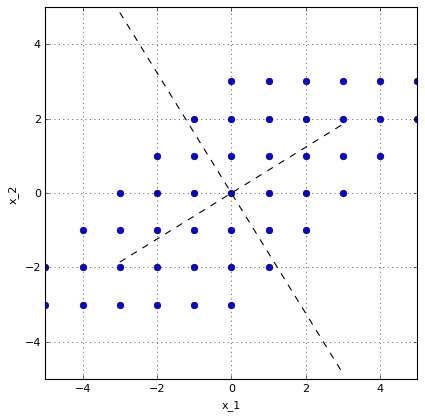

In [38]:
fig = plt.figure(figsize=(6,6))
plt.plot(q_new[0,:], q_new[1,:], 'bo')
plt.plot(x_vec, e_1, 'k--')
plt.plot(x_vec, e_2, 'k--')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()

plt.show()

# 1.4 A movie

<IPython.core.display.Javascript object>


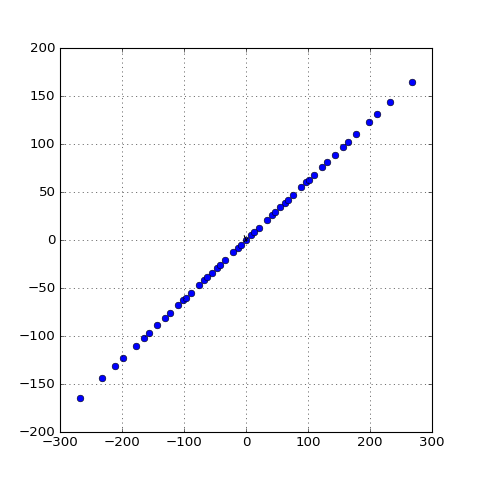

0
1
2
3
4
5
6
7
8
9


In [39]:
%matplotlib notebook


X, Y = np.meshgrid(np.arange(-3,3+1,1), np.arange(-3,3+1,1))
N_pt = len(X.ravel())

q = np.zeros([2,N_pt])
q[0,:] = X.ravel()
q[1,:] = Y.ravel()

N = 10

fig = plt.figure(figsize=(6,6))
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(-5,5)
plt.ylim(-5,5)

for n in range(N):
    print(n)
    
    plt.plot(q[0,:], q[1,:], 'bo')
    plt.plot(x_vec, e_1, 'k--')
    plt.plot(x_vec, e_2, 'k--')
    plt.grid()

    fig.canvas.draw()
    fig.clear()
    time.sleep(0.5)
    
    q = np.dot(A,q)
    
%matplotlib inline

# 2.0 Connections with the singular value decomposition (SVD)

In [40]:
x = 2*np.random.uniform(-1,1, (2,100))

In [41]:
y = np.dot(A,x) + 1*np.random.uniform(-1,1, (2,100))

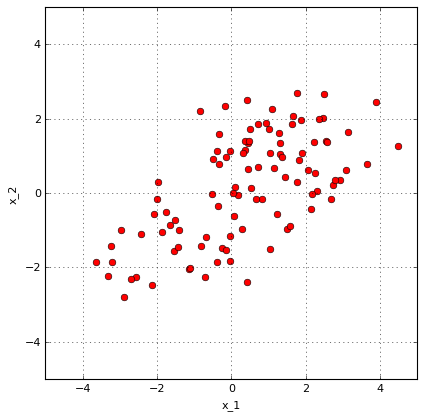

In [42]:
fig = plt.figure(figsize=(6,6))
plt.plot(y[0,:], y[1,:], 'ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()

plt.show()

In [43]:
y.shape

(2, 100)

In [44]:
u, s, v = np.linalg.svd(y)

In [45]:
s

array([ 20.98630575,   9.57947212])

In [46]:
u

array([[-0.82465529, -0.56563561],
       [-0.56563561,  0.82465529]])

In [47]:
x_vec = np.linspace(-5,5,10)
e_1 = (u[1,0]/u[0,0]) * x_vec
e_2 = (u[1,1]/u[0,1]) * x_vec

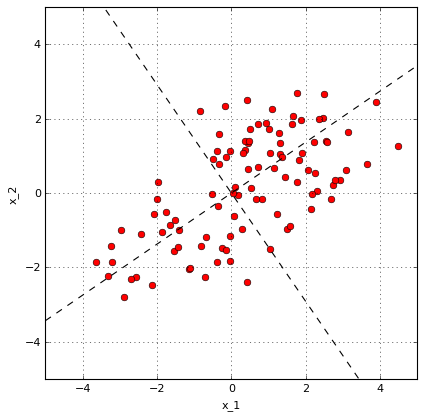

In [48]:
fig = plt.figure(figsize=(6,6))
plt.plot(y[0,:], y[1,:], 'ro')
plt.plot(x_vec, e_1, 'k--')
plt.plot(x_vec, e_2, 'k--')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()

plt.show()